# This document is a comparison of the exact and semiclassical solution to the harmonic oscillator

In [1]:
#Importing the relevant packages
import sympy as sp
from sympy import *
from sympy.physics.qho_1d import psi_n
import matplotlib.pyplot as plt
import numpy as np 
x = symbols("x", real = True)
hbar, omega, m = symbols("hbar omega m")


In [2]:
#Code to make sure the font is as i want it in the plots:
plt.rc('font',family='Times New Roman')

In [3]:
#Defining the H.O. solution function:
def QHO(n, m, omega):
    return psi_n(n, x, m, omega)

In [4]:
#Displaying the first 4(With m=omega=1 for simplification):
i = 0
while i < 4:
    display(QHO(i, 1, 1))
    i += 1

exp(-x**2/(2*hbar))/(hbar**(1/4)*pi**(1/4))

sqrt(2)*x*exp(-x**2/(2*hbar))/(hbar**(3/4)*pi**(1/4))

sqrt(2)*(4*x**2/hbar - 2)*exp(-x**2/(2*hbar))/(4*hbar**(1/4)*pi**(1/4))

sqrt(3)*(8*x**3/hbar**(3/2) - 12*x/sqrt(hbar))*exp(-x**2/(2*hbar))/(12*hbar**(1/4)*pi**(1/4))

In [5]:
#Making the above into functions the rather boring way(simplifying to hbar=1):
def QHO0(x):
    return 1/((np.pi)**(1/4)) *np.e**(-x**2/2)

def QHO1(x):
    return np.sqrt(2)*x/(np.pi)**(1/4) *np.e**(-x**2/2)

def QHO2(x):
    return np.sqrt(2)*(4*x**2-2)/(4*(np.pi)**(1/4)) * np.e**(-x**2/2)

def QHO3(x):
    return np.sqrt(3)*(8*x**3-12*x)/(12*(np.pi)**(1/4)) * np.e**(-x**2/2)

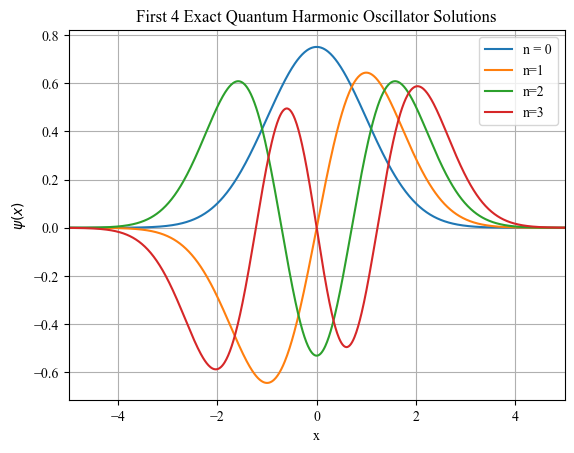

In [6]:
#Making the range of x-values and the corresponding y-values for the QHO functions, and plotting as test:
x_range = np.linspace(-6, 6, 1000)
QHO0y = QHO0(x_range)
QHO1y = QHO1(x_range)
QHO2y = QHO2(x_range)
QHO3y = QHO3(x_range)

plt.plot(x_range, QHO0y, label = "n = 0")
plt.plot(x_range, QHO1y, label = "n=1")
plt.plot(x_range, QHO2y, label = "n=2")
plt.plot(x_range, QHO3y, label = "n=3")
plt.title("First 4 Exact Quantum Harmonic Oscillator Solutions")
plt.xlabel("x")
plt.ylabel("$\psi(x)$")
plt.xlim(-5, 5)
plt.grid()
plt.legend();

In [7]:
#We now need the semiclassical solutions(multiplied by sqrt(2E)). First, the normalization constants are assumed the same as it is for the exact solutions, so we´ll define those:
QHOA0 = 1/((np.pi)**(1/4))
QHOA1 = (3)**(-1/4)*np.sqrt(2)*QHOA0
QHOA2 = (5)**(1/4)*np.sqrt(2)/(2*(np.pi)**(1/4))
QHOA3 = (11)**(1/4)*4*np.sqrt(3)/(12*(np.pi)**(1/4))

#Then we need both the even and uneven ways of writing the semiclassical solutions, as we know that, depending on n, the QHO is either even or odd:
def Semiclassical_even_QHO_classical(A, p, P):
    return A/np.sqrt(p) * np.cos(P)

def Semiclassical_uneven_QHO_classical(A, p, P):
    return A/np.sqrt(p) * np.sin(P)
#Where one notes that p is the momentum, and P the integrated momentum.

#Next the non-classical:
def Semiclassical_QHO_Non_Classical(A, p, P):
    return A/(np.sqrt(p)) * np.e**(-P)
    

#Defining the momentum and integrated momentum:
def QHO_momentum(x, E):
    return np.sqrt(2*(abs(E-1/2 * x**2)))

def QHO_momentum_integrated_classic(x, E):
    return 1/2 * np.sqrt(abs(2*E-x**2))*x + E*np.arctan(x/(np.sqrt(abs(2*E-x**2))))

def QHO_momentum_integrated_quantum(x, E):
    return 1/2 * np.sqrt(abs(2*E-x**2))*abs(x) + E*np.arctan(abs(x)/(np.sqrt(abs(2*E-x**2))))
#def QHO_momentum_integrated_quantum(x, E): #This one´s Geogebra classic 5´s integration instead of wolfram.
   # return E*np.log(abs(-abs(x)+np.sqrt(x**2-2*E)))+1/2 * abs(x)*np.sqrt(x**2-2*E)

#What we need now, is the turning points of each solution, which is the point where V(x) = E, which we´ll define, as we know where they are theoretically:
X_turning_0 = np.sqrt(2*1/2)
X_turning_1 = np.sqrt(2*(1/2+1))
X_turning_2 = np.sqrt(2*(1/2+2))
X_turning_3 = np.sqrt(2*(1/2+3))

#Now the x ranges, both total, classical, and quantum:
X_range_0_classical = np.linspace(-X_turning_0, X_turning_0, 500)
X_range_0_quantum = np.hstack((np.linspace(-6, -X_turning_0, 250),np.linspace(X_turning_0, 6, 250)))
X_range_0_total = np.hstack((np.linspace(-6, -X_turning_0, 250),np.linspace(-X_turning_0, X_turning_0, 500),np.linspace(X_turning_0, 6, 250)))

X_range_1_classical = np.linspace(-X_turning_1, X_turning_1, 500)
X_range_1_quantum = np.hstack((np.linspace(-6, -X_turning_1, 250),np.linspace(X_turning_1, 6, 250)))
X_range_1_total = np.hstack((np.linspace(-6, -X_turning_1, 250),np.linspace(-X_turning_1, X_turning_1, 500),np.linspace(X_turning_1, 6, 250)))

X_range_2_classical = np.linspace(-X_turning_2, X_turning_2, 500)
X_range_2_quantum = np.hstack((np.linspace(-6, -X_turning_2, 250),np.linspace(X_turning_2, 6, 250)))
X_range_2_total = np.hstack((np.linspace(-6, -X_turning_2, 250),np.linspace(-X_turning_2, X_turning_2, 500),np.linspace(X_turning_2, 6, 250)))

X_range_3_classical = np.linspace(-X_turning_3, X_turning_3, 500)
X_range_3_quantum = np.hstack((np.linspace(-6, -X_turning_3, 250),np.linspace(X_turning_3, 6, 250)))
X_range_3_total = np.hstack((np.linspace(-6, -X_turning_3, 250),np.linspace(-X_turning_3, X_turning_3, 500),np.linspace(X_turning_3, 6, 250)))

#Now we can construct the semiclassical solutions. Here, we´ll define a constant, a, such that we don´t evaluate the function in the turning point,
#at least for the quantum side, as it is divide by 0, and ruins the plot otherwise.
a = 0.00001
#First the n=0:
QHO_semiclassical_0 = np.hstack( ( Semiclassical_QHO_Non_Classical(QHOA0, QHO_momentum(np.linspace(-6, -X_turning_0-a, 250), 1/2), QHO_momentum_integrated_quantum(np.linspace(-6, -X_turning_0-a, 250), 1/2)), Semiclassical_even_QHO_classical(QHOA0, QHO_momentum(X_range_0_classical, 1/2), QHO_momentum_integrated_classic(X_range_0_classical, 1/2)),Semiclassical_QHO_Non_Classical(QHOA0, QHO_momentum(np.linspace(X_turning_0+a, 6, 250), 1/2), QHO_momentum_integrated_quantum(np.linspace(X_turning_0+a, 6, 250), 1/2))  ) )
QHO_semiclassical_1 = np.hstack( ( -Semiclassical_QHO_Non_Classical(QHOA1, QHO_momentum(np.linspace(-6, -X_turning_1-a, 250), 3/2), QHO_momentum_integrated_quantum(np.linspace(-6, -X_turning_1-a, 250), 3/2)), Semiclassical_uneven_QHO_classical(QHOA1, QHO_momentum(X_range_1_classical, 3/2), QHO_momentum_integrated_classic(X_range_1_classical, 3/2)),Semiclassical_QHO_Non_Classical(QHOA1, QHO_momentum(np.linspace(X_turning_1+a, 6, 250), 3/2), QHO_momentum_integrated_quantum(np.linspace(X_turning_1+a, 6, 250), 3/2))  ) )
QHO_semiclassical_2 = -np.hstack( ( -Semiclassical_QHO_Non_Classical(QHOA2, QHO_momentum(np.linspace(-6, -X_turning_2-a, 250), 5/2), QHO_momentum_integrated_quantum(np.linspace(-6, -X_turning_2-a, 250), 5/2)), Semiclassical_even_QHO_classical(QHOA2, QHO_momentum(X_range_2_classical, 5/2), QHO_momentum_integrated_classic(X_range_2_classical, 5/2)),-Semiclassical_QHO_Non_Classical(QHOA2, QHO_momentum(np.linspace(X_turning_2+a, 6, 250), 5/2), QHO_momentum_integrated_quantum(np.linspace(X_turning_2+a, 6, 250), 5/2))  ) )
QHO_semiclassical_3 = -np.hstack( ( Semiclassical_QHO_Non_Classical(QHOA3, QHO_momentum(np.linspace(-6, -X_turning_3-a, 250), 7/2), QHO_momentum_integrated_quantum(np.linspace(-6, -X_turning_3-a, 250), 7/2)), Semiclassical_uneven_QHO_classical(QHOA3, QHO_momentum(X_range_3_classical, 7/2), QHO_momentum_integrated_classic(X_range_3_classical, 7/2)),-Semiclassical_QHO_Non_Classical(QHOA3, QHO_momentum(np.linspace(X_turning_3+a, 6, 250), 7/2), QHO_momentum_integrated_quantum(np.linspace(X_turning_3+a, 6, 250), 7/2))  ) )


C:\Users\Chris\AppData\Local\Temp\ipykernel_3004\986111621.py:25: RuntimeWarning: divide by zero encountered in divide
  return 1/2 * np.sqrt(abs(2*E-x**2))*x + E*np.arctan(x/(np.sqrt(abs(2*E-x**2))))
C:\Users\Chris\AppData\Local\Temp\ipykernel_3004\986111621.py:9: RuntimeWarning: divide by zero encountered in divide
  return A/np.sqrt(p) * np.cos(P)


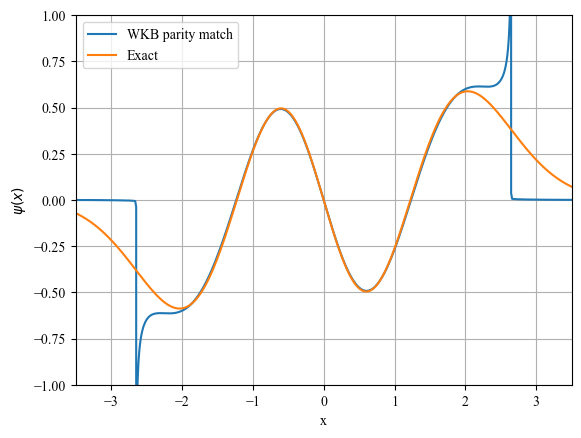

In [13]:
plt.plot(X_range_3_total, QHO_semiclassical_3,  label = "WKB parity match")
plt.plot(x_range, QHO3y, label = "Exact")
#plt.title("Ground state")
plt.ylim(-1, 1)
plt.xlim(-3.5, 3.5)
plt.ylabel("$\psi(x)$")
plt.xlabel("x")
plt.grid()
plt.legend()
plt.savefig("HOplot4")
